In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import math

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("covid_19_Andaman and Nicobar Islands.csv")
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Sno,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Dates
0,0,0,365,365,366,Andaman and Nicobar Islands,0,0,1,2020,3,26
1,1,1,392,392,393,Andaman and Nicobar Islands,0,0,0,2020,3,27
2,2,2,420,420,421,Andaman and Nicobar Islands,0,0,5,2020,3,28
3,3,3,447,447,448,Andaman and Nicobar Islands,0,0,3,2020,3,29
4,4,4,474,474,475,Andaman and Nicobar Islands,0,0,0,2020,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,499,17865,17865,17931,Andaman and Nicobar Islands,0,0,0,2021,8,7
500,500,500,17901,17901,17967,Andaman and Nicobar Islands,1,0,3,2021,8,8
501,501,501,17937,17937,18003,Andaman and Nicobar Islands,1,0,2,2021,8,9
502,502,502,17973,17973,18039,Andaman and Nicobar Islands,2,0,0,2021,8,10


In [21]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Sno,State/UnionTerritory,Cured,Deaths,Confirmed,Year,Month,Dates
0,0,0,365,365,366,Andaman and Nicobar Islands,0,0,1,2020,3,26
1,1,1,392,392,393,Andaman and Nicobar Islands,0,0,0,2020,3,27
2,2,2,420,420,421,Andaman and Nicobar Islands,0,0,5,2020,3,28
3,3,3,447,447,448,Andaman and Nicobar Islands,0,0,3,2020,3,29
4,4,4,474,474,475,Andaman and Nicobar Islands,0,0,0,2020,3,30


In [22]:
data = df[["Year","Month","Dates","Confirmed"]]

<AxesSubplot:>

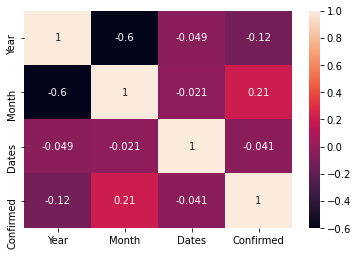

In [23]:
sns.heatmap(data.corr(),annot=True)

In [24]:
X = df[["Year","Month","Dates"]]
Y = df[["Confirmed"]]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test , y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [27]:
X_train

,Year,Month,Dates
5,2020,3,31
116,2020,7,20
45,2020,5,10
16,2020,4,11
493,2021,8,1
...,...,...,...
106,2020,7,10
270,2020,12,21
348,2021,3,9
435,2021,6,4


In [28]:
data.loc[0]

Year         2020
Month           3
Dates          26
Confirmed       1
Name: 0, dtype: int64

### Linear Regression

In [29]:
lr = linear_model.LinearRegression(normalize=True,n_jobs=-1)

In [30]:
lr.fit(X_train.values,y_train.values)

LinearRegression(n_jobs=-1, normalize=True)

In [31]:
pred = lr.predict(X_test.values)

In [32]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [33]:
mean_squared_error(pred,y_test.values)

501.3900231223505

In [34]:
mean_absolute_error(pred,y_test.values)

14.946795707197055

In [35]:
mean_absolute_percentage_error(pred,y_test.values)

1.027315302586796

In [36]:
x = np.array([2020,12,13])

In [37]:
lr.predict(x.reshape(1,-1))[0][0]

25.315330072030974

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dr = DecisionTreeRegressor()

In [40]:
dr.fit(X_train.values,y_train.values)

DecisionTreeRegressor()

In [41]:
 dr_pred = dr.predict(X_test.values)

In [42]:
mean_squared_error(dr_pred,y_test.values)

75.27631578947368

In [43]:
dr.predict(x.reshape(1,-1))

array([7.])

In [44]:
mean_absolute_error(dr_pred,y_test.values)

4.4605263157894735

### Random Forest

In [45]:

from sklearn.ensemble import RandomForestRegressor

In [46]:
rf = RandomForestRegressor()
rf.fit(X_train.values,y_train.values)

<ipython-input-46-1eb16d7c1019>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train.values,y_train.values)


RandomForestRegressor()

In [47]:
rf_pred = rf.predict(X_test.values)

In [48]:
mean_absolute_error(rf_pred,y_test.values)

3.8515789473684214

In [49]:
mean_squared_error(rf_pred,y_test.values)

45.96266710526316

In [50]:
math.ceil(rf.predict(x.reshape(1,-1)))

8